In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
 
dataset = pd.read_csv('onion2.csv')

#df_new['Rainfall'].value_counts()
dataset=dataset.drop(['Production'],axis=1)

dataset['fertilizer'] = dataset['NPK']

dataset=dataset.drop(['DAP'],axis=1)
dataset=dataset.drop(['MAP'],axis=1)
dataset=dataset.drop(['MOP'],axis=1)
dataset=dataset.drop(['NPK'],axis=1)
dataset=dataset.drop(['UREA'],axis=1)
dataset=dataset.drop(['TSP'],axis=1)
dataset

,Area,Labour_hours,Rainfall,Yield,fertilizer
0,1770,562,1094,18284.745760,1.0
1,1103,562,1094,14025.385310,1.0
2,482,562,1094,23887.966800,1.0
3,1165,562,1094,16508.154510,1.0
4,380,562,1094,22276.315790,1.0
...,...,...,...,...,...
2696,8,562,494,1625.000000,1.0
2697,29,562,494,1310.344828,1.0
2698,17,562,494,4588.235294,1.0
2699,3,562,494,14333.333330,1.0


In [2]:
dataset['fertilizer'].value_counts()

1.00    2507
0.75     194
Name: fertilizer, dtype: int64

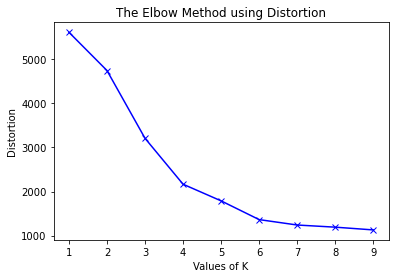

In [3]:
X=dataset.values
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt 

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 
    
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

[[ 8.36394257e-01  1.58216388e+00  2.57606075e+00  9.35842557e-02
   2.78178588e-01]
 [ 4.09364108e-01  1.58216388e+00  2.57606075e+00 -8.97032548e-03
   2.78178588e-01]
 [ 1.17843138e-02  1.58216388e+00  2.57606075e+00  2.28495587e-01
   2.78178588e-01]
 ...
 [-2.85920363e-01  1.58216388e+00 -4.29230338e-01 -2.36192928e-01
   2.78178588e-01]
 [-2.94883515e-01  1.58216388e+00 -4.29230338e-01 -1.55571932e-03
   2.78178588e-01]
 [-2.87200813e-01  1.58216388e+00 -4.29230338e-01 -2.88880076e-01
   2.78178588e-01]]


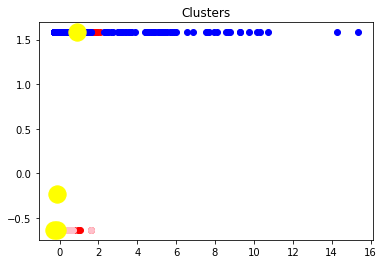

In [4]:


#scaler = StandardScaler() 
  
# To scale data 
#scaler.fit(dataset)

#X = preprocessing.scale(dataset)

#print(dataset)

#min_max_scaler = preprocessing.MinMaxScaler()
#X = min_max_scaler.fit_transform(dataset)

scalerX = StandardScaler().fit(dataset)

X = scalerX.transform(dataset)


#X=X_scaled.values
#X=dataset.values
print(X)

#X_old = scalerX.inverse_transform(X)

#print(X_old)

# Applying k-means to the sample dataset
#k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence. 
#Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
#Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=4,init='k-means++',max_iter=300,n_init=10,random_state=0) 
#Compute cluster centers and predict cluster index for each sample.
y_kmeans = kmeans.fit_predict(X)
dataset['Cluster'] = pd.Series(y_kmeans, index=dataset.index)

# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],c='red',label='A')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],c='blue',label='B')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],c='green',label='C')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3,1],c='pink',label='D')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters')

plt.show()

In [5]:
dataset
dataset['Cluster'].value_counts()

0    2118
1     389
3     193
2       1
Name: Cluster, dtype: int64

In [6]:
grouped = dataset.groupby(dataset.Cluster)

cluster0 = grouped.get_group(0)
cluster1 = grouped.get_group(1)
cluster2 = grouped.get_group(2)
cluster3 = grouped.get_group(3)



In [7]:
cluster0=cluster0.drop(['Cluster'],axis=1)
cluster1=cluster1.drop(['Cluster'],axis=1)
cluster2=cluster2.drop(['Cluster'],axis=1)
cluster3=cluster3.drop(['Cluster'],axis=1)

In [8]:
print(cluster0.max()) 
print(cluster0.min())

print(cluster1.max()) 
print(cluster1.min())

print(cluster2.max()) 
print(cluster2.min())

print(cluster3.max()) 
print(cluster3.min())

Area             3724.00000
Labour_hours      562.00000
Rainfall          494.00000
Yield           50666.66667
fertilizer          1.00000
dtype: float64
Area              1.0
Labour_hours    422.0
Rainfall        494.0
Yield             0.0
fertilizer        1.0
dtype: float64
Area            24460.00000
Labour_hours      562.00000
Rainfall         1094.00000
Yield           31334.31953
fertilizer          1.00000
dtype: float64
Area               1.000000
Labour_hours     562.000000
Rainfall         494.000000
Yield           2462.249346
fertilizer         1.000000
dtype: float64
Area                  2.00
Labour_hours        422.00
Rainfall            617.00
Yield           2150000.00
fertilizer            0.75
dtype: float64
Area                  2.00
Labour_hours        422.00
Rainfall            617.00
Yield           2150000.00
fertilizer            0.75
dtype: float64
Area             3003.00
Labour_hours      422.00
Rainfall          617.00
Yield           50000.00
fertilizer

In [9]:
bin_area = [-1,100,500,25000]
bin_labour = [-1,300,500,600]
bin_rainfall = [400,500,800,1100]
bin_yield= [-1,12000,30000,2250000]
bin_fertilizer=[0,0.6,0.8,1]

In [13]:
category = pd.cut(cluster0.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster0,category],axis = 1)
df_new
category = pd.cut(cluster0.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster0.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster0.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

print(df_new)

df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
print(merged)



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

#print(merged)


frq_items = apriori(merged, min_support = 0.4, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('onion_rules1.csv')
rules

      Area  Labour_hours  Rainfall         Yield  fertilizer  range_area  \
346    110           422       494   9890.909091         1.0  (100, 500]   
347    164           422       494  12073.170730         1.0  (100, 500]   
348    108           422       494  14333.333330         1.0  (100, 500]   
349     38           422       494  10315.789470         1.0   (-1, 100]   
350     25           422       494  11160.000000         1.0   (-1, 100]   
...    ...           ...       ...           ...         ...         ...   
2696     8           562       494   1625.000000         1.0   (-1, 100]   
2697    29           562       494   1310.344828         1.0   (-1, 100]   
2698    17           562       494   4588.235294         1.0   (-1, 100]   
2699     3           562       494  14333.333330         1.0   (-1, 100]   
2700    15           562       494   2400.000000         1.0   (-1, 100]   

     range_labour range_rainfall     range_yield range_fertilizer  
346    (300, 500]  

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,"((-1, 100]_a)","((400, 500]_r)",0.510387,1.000000,0.510387,1.000000,1.0,0.0,inf
3,"((-1, 100]_a)","((0.8, 1.0]_fert)",0.510387,1.000000,0.510387,1.000000,1.0,0.0,inf
4,"((300, 500]_l)","((400, 500]_r)",0.819641,1.000000,0.819641,1.000000,1.0,0.0,inf
8,"((300, 500]_l)","((0.8, 1.0]_fert)",0.819641,1.000000,0.819641,1.000000,1.0,0.0,inf
11,"((-1, 12000]_y)","((400, 500]_r)",0.464117,1.000000,0.464117,1.000000,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
10,"((400, 500]_r)","((-1, 12000]_y)",1.000000,0.464117,0.464117,0.464117,1.0,0.0,1.0
16,"((0.8, 1.0]_fert)","((-1, 12000]_y)",1.000000,0.464117,0.464117,0.464117,1.0,0.0,1.0
44,"((400, 500]_r, (0.8, 1.0]_fert)","((-1, 12000]_y)",1.000000,0.464117,0.464117,0.464117,1.0,0.0,1.0
47,"((400, 500]_r)","((0.8, 1.0]_fert, (-1, 12000]_y)",1.000000,0.464117,0.464117,0.464117,1.0,0.0,1.0


In [11]:
category = pd.cut(cluster1.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster1,category],axis = 1)
df_new
category = pd.cut(cluster1.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster1.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster1.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.6, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('onion_rules2.csv')
rules

(500, 25000]    162
(100, 500]      116
(-1, 100]       111
Name: range_area, dtype: int64
(12000, 30000]      298
(-1, 12000]          90
(30000, 2250000]      1
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((800, 1100]_r)","((500, 600]_l)",0.889460,1.000000,0.889460,1.000000,1.000000,0.000000,inf
2,"((12000, 30000]_y)","((500, 600]_l)",0.766067,1.000000,0.766067,1.000000,1.000000,0.000000,inf
4,"((0.8, 1.0]_fert)","((500, 600]_l)",1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
5,"((500, 600]_l)","((0.8, 1.0]_fert)",1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,inf
8,"((800, 1100]_r)","((0.8, 1.0]_fert)",0.889460,1.000000,0.889460,1.000000,1.000000,0.000000,inf
10,"((12000, 30000]_y)","((0.8, 1.0]_fert)",0.766067,1.000000,0.766067,1.000000,1.000000,0.000000,inf
12,"((12000, 30000]_y, (800, 1100]_r)","((500, 600]_l)",0.758355,1.000000,0.758355,1.000000,1.000000,0.000000,inf
18,"((800, 1100]_r, (0.8, 1.0]_fert)","((500, 600]_l)",0.889460,1.000000,0.889460,1.000000,1.000000,0.000000,inf
19,"((800, 1100]_r, (500, 600]_l)","((0.8, 1.0]_fert)",0.889460,1.000000,0.889460,1.000000,1.000000,0.000000,inf
21,"((800, 1100]_r)","((0.8, 1.0]_fert, (500, 600]_l)",0.889460,1.000000,0.889460,1.000000,1.000000,0.000000,inf


In [64]:
category = pd.cut(cluster2.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster2,category],axis = 1)
df_new
category = pd.cut(cluster2.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster2.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster2.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.6, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('onion_rules3.csv')
rules

(-1, 100]       1
(500, 25000]    0
(100, 500]      0
Name: range_area, dtype: int64
(30000, 2250000]    1
(12000, 30000]      0
(-1, 12000]         0
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((-1, 100]_a)","((300, 500]_l)",1.0,1.0,1.0,1.0,1.0,0.0,inf
1,"((300, 500]_l)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
2,"((-1, 100]_a)","((500, 800]_r)",1.0,1.0,1.0,1.0,1.0,0.0,inf
3,"((500, 800]_r)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
4,"((30000, 2250000]_y)","((-1, 100]_a)",1.0,1.0,1.0,1.0,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
175,"((-1, 100]_a)","((30000, 2250000]_y, (500, 800]_r, (300, 500]_...",1.0,1.0,1.0,1.0,1.0,0.0,inf
176,"((500, 800]_r)","((30000, 2250000]_y, (-1, 100]_a, (300, 500]_l...",1.0,1.0,1.0,1.0,1.0,0.0,inf
177,"((300, 500]_l)","((30000, 2250000]_y, (-1, 100]_a, (500, 800]_r...",1.0,1.0,1.0,1.0,1.0,0.0,inf
178,"((30000, 2250000]_y)","((-1, 100]_a, (500, 800]_r, (300, 500]_l, (0.6...",1.0,1.0,1.0,1.0,1.0,0.0,inf


In [65]:
category = pd.cut(cluster3.Area,bin_area)
category = category.to_frame()
category.columns = ['range_area']
#concatenate age and its bin
df_new = pd.concat([cluster3,category],axis = 1)
df_new
category = pd.cut(cluster3.Labour_hours,bin_labour)
category = category.to_frame()
category.columns = ['range_labour']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new
category = pd.cut(cluster3.Rainfall,bin_rainfall)
category = category.to_frame()
category.columns = ['range_rainfall']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster3.Yield,bin_yield)
category = category.to_frame()
category.columns = ['range_yield']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new

category = pd.cut(cluster3.fertilizer,bin_fertilizer)
category = category.to_frame()
category.columns = ['range_fertilizer']
#concatenate age and its bin
df_new = pd.concat([df_new,category],axis = 1)
df_new


df_new=df_new.drop(['Area'],axis=1)
df_new=df_new.drop(['Labour_hours'],axis=1)
df_new=df_new.drop(['Rainfall'],axis=1)
df_new=df_new.drop(['Yield'],axis=1)
df_new=df_new.drop(['fertilizer'],axis=1)
# df_new=df_new.drop(['DAP'],axis=1)
# df_new=df_new.drop(['MAP'],axis=1)
# df_new=df_new.drop(['MOP'],axis=1)
# df_new=df_new.drop(['NPK'],axis=1)
# df_new=df_new.drop(['UREA'],axis=1)
# df_new=df_new.drop(['TSP'],axis=1)

print(df_new['range_area'].value_counts())
print(df_new['range_yield'].value_counts())

import numpy as np 
import pandas as pd 
from mlxtend.frequent_patterns import apriori, association_rules 


dummies1=pd.get_dummies(df_new.range_area)
dummies2=pd.get_dummies(df_new.range_labour)
dummies3=pd.get_dummies(df_new.range_rainfall)
dummies4=pd.get_dummies(df_new.range_yield)
dummies5=pd.get_dummies(df_new.range_fertilizer)

# dummies5=pd.get_dummies(df_new.range_dap)
# dummies6=pd.get_dummies(df_new.range_map)
# dummies7=pd.get_dummies(df_new.range_mop)
# dummies8=pd.get_dummies(df_new.range_npk)
# dummies9=pd.get_dummies(df_new.range_urea)
# dummies10=pd.get_dummies(df_new.range_tsp)


#merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5,dummies6,dummies7,dummies8,dummies9,dummies10],axis='columns')
merged=pd.concat([df_new,dummies1,dummies2,dummies3,dummies4,dummies5],axis='columns')
merged



#merged = merged.rename(columns={'(-1, 59963]': '(-1, 59963]_A','(59963, 153521]':'(59963, 153521]_A'})

merged=merged.drop(['range_area'],axis=1)
merged=merged.drop(['range_labour'],axis=1)
merged=merged.drop(['range_rainfall'],axis=1)
merged=merged.drop(['range_yield'],axis=1)
merged=merged.drop(['range_fertilizer'],axis=1)

# merged=merged.drop(['range_dap'],axis=1)
# merged=merged.drop(['range_map'],axis=1)
# merged=merged.drop(['range_mop'],axis=1)
# merged=merged.drop(['range_npk'],axis=1)
# merged=merged.drop(['range_urea'],axis=1)
# merged=merged.drop(['range_tsp'],axis=1)



#merged.columns=['(-1, 59963]_a','(59963, 153521]_a','(153521, 410000]_a','(-1, 419]_','(419, 600]_l','(600, 1000]_l','(-1, 494]_r','(494, 800]_r','(800, 1200]_r','(-1, 2000]_y','(2000, 3000]_y','(3000, 11000]_y','(0.0, 0.3]_dap','(0.3, 0.6]_dap','(0.6, 1.0]_dap','(0.0, 0.3]_map','(0.3, 0.6]_map','(0.6, 1.0]_map','(0.0, 0.3]_mop','(0.3, 0.6]_mop','(0.6, 1.0]_mop','(0.0, 0.3]_npk','(0.3, 0.6]_npk','(0.6, 1.0]_npk','(0.0, 0.3]_urea','(0.3, 0.6]_urea','(0.6, 1.0]_urea','(0.0, 0.3]_tsp','(0.3, 0.6]_tsp','(0.6, 1.0]_tsp']
merged.columns=['(-1, 100]_a','(100, 500]_a','(500, 25000]_a','(-1, 300]_l','(300, 500]_l','(500, 600]_l','(400, 500]_r','(500, 800]_r','(800, 1100]_r','(-1, 12000]_y','(12000, 30000]_y','(30000, 2250000]_y','(0.0, 0.6]_fert','(0.6, 0.8]_fert','(0.8, 1.0]_fert']

merged


frq_items = apriori(merged, min_support = 0.6, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
#print(rules.head()) 


rules.to_csv('onion_rules4.csv')
rules

(-1, 100]       119
(100, 500]       44
(500, 25000]     30
Name: range_area, dtype: int64
(12000, 30000]      167
(-1, 12000]          18
(30000, 2250000]      8
Name: range_yield, dtype: int64


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((-1, 100]_a)","((300, 500]_l)",0.61658,1.00000,0.61658,1.00000,1.0,0.0,inf
2,"((-1, 100]_a)","((500, 800]_r)",0.61658,1.00000,0.61658,1.00000,1.0,0.0,inf
4,"((-1, 100]_a)","((0.6, 0.8]_fert)",0.61658,1.00000,0.61658,1.00000,1.0,0.0,inf
6,"((500, 800]_r)","((300, 500]_l)",1.00000,1.00000,1.00000,1.00000,1.0,0.0,inf
7,"((300, 500]_l)","((500, 800]_r)",1.00000,1.00000,1.00000,1.00000,1.0,0.0,inf
...,...,...,...,...,...,...,...,...,...
68,"((500, 800]_r, (0.6, 0.8]_fert)","((-1, 100]_a, (300, 500]_l)",1.00000,0.61658,0.61658,0.61658,1.0,0.0,1.0
69,"((300, 500]_l, (0.6, 0.8]_fert)","((-1, 100]_a, (500, 800]_r)",1.00000,0.61658,0.61658,0.61658,1.0,0.0,1.0
71,"((500, 800]_r)","((-1, 100]_a, (300, 500]_l, (0.6, 0.8]_fert)",1.00000,0.61658,0.61658,0.61658,1.0,0.0,1.0
72,"((300, 500]_l)","((-1, 100]_a, (500, 800]_r, (0.6, 0.8]_fert)",1.00000,0.61658,0.61658,0.61658,1.0,0.0,1.0
